In [420]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np 
import pandas as pd

In [421]:
meta = yf.download("META")
meta.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [422]:
meta.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-18,219.910004,220.440002,216.210007,217.889999,217.889999,12281000
2023-04-19,213.470001,217.330002,212.929993,215.699997,215.699997,15898100
2023-04-20,213.479996,216.750000,212.770004,213.070007,213.070007,16475400
2023-04-21,210.210007,213.410004,209.580002,212.889999,212.889999,17702400
2023-04-24,213.675003,213.910004,210.720001,212.789993,212.789993,14402302


In [423]:
meta.index

DatetimeIndex(['2012-05-18', '2012-05-21', '2012-05-22', '2012-05-23',
               '2012-05-24', '2012-05-25', '2012-05-29', '2012-05-30',
               '2012-05-31', '2012-06-01',
               ...
               '2023-04-11', '2023-04-12', '2023-04-13', '2023-04-14',
               '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20',
               '2023-04-21', '2023-04-24'],
              dtype='datetime64[ns]', name='Date', length=2750, freq=None)

In [424]:
meta.index[1]

Timestamp('2012-05-21 00:00:00')

In [425]:
meta.index[-1]

Timestamp('2023-04-24 00:00:00')

In [426]:
meta.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [427]:
meta.shape


(2750, 6)

<AxesSubplot: xlabel='Date'>

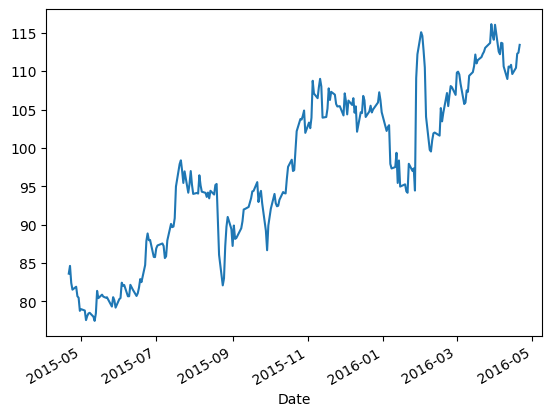

In [428]:
meta.loc["2015-04-21":"2016-04-21", "Close"].plot()


In [429]:
meta['Price1'] = meta['Close'].shift(-1)
meta['pricediff'] = meta['Price1'] - meta['Close']

meta.head()

In [430]:
meta['Returns'] =  meta['pricediff'] / meta['Close'] *100
meta.head()

,Open,High,Low,Close,Adj Close,Volume,Price1,pricediff,Returns
Date,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,34.029999,-4.200001,-10.986139
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,31.000000,-3.029999,-8.903905
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,32.000000,1.000000,3.225806
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,33.029999,1.029999,3.218746
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,31.910000,-1.119999,-3.390854


In [431]:
meta['Deirection'] = [1 if meta.loc[ei, 'Returns'] > 0 else -1 for ei in meta.index]
meta.head()

,Open,High,Low,Close,Adj Close,Volume,Price1,pricediff,Returns,Deirection
Date,,,,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,34.029999,-4.200001,-10.986139,-1
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,31.000000,-3.029999,-8.903905,-1
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,32.000000,1.000000,3.225806,1
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,33.029999,1.029999,3.218746,1
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,31.910000,-1.119999,-3.390854,-1


In [432]:
meta['MA40'] = meta['Close'].rolling(40).mean()
meta['MA200'] = meta['Close'].rolling(200).mean()
meta.tail()

,Open,High,Low,Close,Adj Close,Volume,Price1,pricediff,Returns,Deirection,MA40,MA200
Date,,,,,,,,,,,,
2023-04-18,219.910004,220.440002,216.210007,217.889999,217.889999,12281000,215.699997,-2.190002,-1.005095,-1,196.684499,153.53140
2023-04-19,213.470001,217.330002,212.929993,215.699997,215.699997,15898100,213.070007,-2.629990,-1.219281,-1,197.774999,153.80975
2023-04-20,213.479996,216.750000,212.770004,213.070007,213.070007,16475400,212.889999,-0.180008,-0.084483,-1,198.823750,154.03415
2023-04-21,210.210007,213.410004,209.580002,212.889999,212.889999,17702400,212.789993,-0.100006,-0.046975,-1,199.845000,154.24975
2023-04-24,213.675003,213.910004,210.720001,212.789993,212.789993,14402302,NaN,NaN,NaN,-1,200.905000,154.45275


<AxesSubplot: xlabel='Date'>

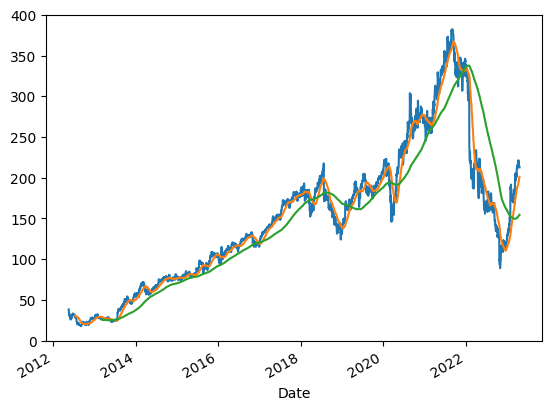

In [433]:
meta['Close'].plot()
meta['MA40'].plot()
meta['MA200'].plot()

In [434]:
msft = yf.download("MSFT")
msft.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060657,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062823,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063907,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062281,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061198,47894400


<AxesSubplot: xlabel='Date'>

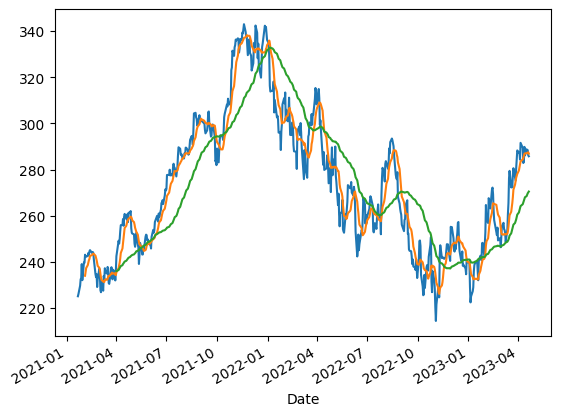

In [435]:
msft_2020 = msft.loc['2021-01-21':'2023-04-23',:] 

msft_2020['MA10'] = msft_2020['Close'].rolling(10).mean()
msft_2020['MA50'] = msft_2020['Close'].rolling(50).mean()

msft_2020['Close'].plot()
msft_2020['MA10'].plot()
msft_2020['MA50'].plot()



In [436]:
msft_2020['Shares'] = [1 if msft_2020.loc[ei,'MA10'] > msft_2020.loc[ei, 'MA50'] else 0 for ei in msft_2020.index]

In [437]:
msft_2020

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares
Date,,,,,,,,,
2021-01-21,224.699997,226.300003,222.419998,224.970001,220.476608,30709400,NaN,NaN,0
2021-01-22,227.080002,230.070007,225.800003,225.949997,221.437027,30172700,NaN,NaN,0
2021-01-25,229.119995,229.779999,224.220001,229.529999,224.945526,33152100,NaN,NaN,0
2021-01-26,231.860001,234.179993,230.080002,232.330002,227.689606,49169600,NaN,NaN,0
2021-01-27,238.000000,240.440002,230.139999,232.899994,228.248230,69870600,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
2023-04-17,289.929993,291.600006,286.160004,288.799988,288.799988,23836200,287.084000,268.456401,1
2023-04-18,291.570007,291.760010,287.010010,288.369995,288.369995,20161800,287.197998,269.056801,1
2023-04-19,285.989990,289.049988,284.540009,288.450012,288.450012,17150300,287.325000,269.690401,1


In [438]:
msft_2020['close1'] = msft_2020['Close'].shift(-1) 
msft_2020['Profit'] = [ msft_2020.loc[ei, 'close1'] - msft_2020.loc[ei, 'Close']  if msft_2020.loc[ei, 'Shares'] == 1 
                       else 0 for ei in msft_2020.index]
msft_2020

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,close1,Profit
Date,,,,,,,,,,,
2021-01-21,224.699997,226.300003,222.419998,224.970001,220.476608,30709400,NaN,NaN,0,225.949997,0.000000
2021-01-22,227.080002,230.070007,225.800003,225.949997,221.437027,30172700,NaN,NaN,0,229.529999,0.000000
2021-01-25,229.119995,229.779999,224.220001,229.529999,224.945526,33152100,NaN,NaN,0,232.330002,0.000000
2021-01-26,231.860001,234.179993,230.080002,232.330002,227.689606,49169600,NaN,NaN,0,232.899994,0.000000
2021-01-27,238.000000,240.440002,230.139999,232.899994,228.248230,69870600,NaN,NaN,0,238.929993,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17,289.929993,291.600006,286.160004,288.799988,288.799988,23836200,287.084000,268.456401,1,288.369995,-0.429993
2023-04-18,291.570007,291.760010,287.010010,288.369995,288.369995,20161800,287.197998,269.056801,1,288.450012,0.080017
2023-04-19,285.989990,289.049988,284.540009,288.450012,288.450012,17150300,287.325000,269.690401,1,286.109985,-2.340027


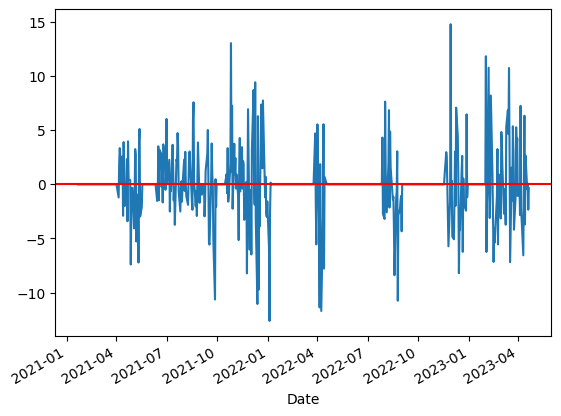

In [439]:
msft_2020['Profit'].plot()
plt.axhline(y=0,color='red')

In [442]:
msft_2020['Wealth'] = msft_2020['Profit'].cumsum()
msft_2020.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,close1,Profit,Wealth
Date,,,,,,,,,,,,
2023-04-17,289.929993,291.600006,286.160004,288.799988,288.799988,23836200,287.084000,268.456401,1,288.369995,-0.429993,6.479965
2023-04-18,291.570007,291.760010,287.010010,288.369995,288.369995,20161800,287.197998,269.056801,1,288.450012,0.080017,6.559982
2023-04-19,285.989990,289.049988,284.540009,288.450012,288.450012,17150300,287.325000,269.690401,1,286.109985,-2.340027,4.219955
2023-04-20,285.250000,289.029999,285.079987,286.109985,286.109985,23244400,287.501999,270.061401,1,285.760010,-0.349976,3.869980
2023-04-21,285.010010,286.269989,283.059998,285.760010,285.760010,21665400,286.917999,270.442001,1,NaN,NaN,NaN


The total money you earned is:  3.8699798583984375
The total money you payed is:  224.97000122070312


<AxesSubplot: xlabel='Date'>

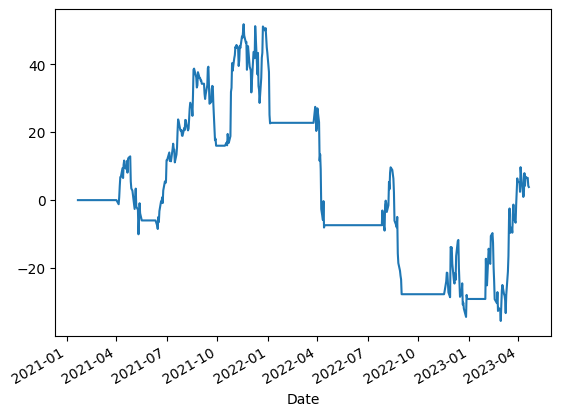

In [441]:
print("The total money you earned is: " , msft_2020.loc[msft_2020.index[-2] , 'Wealth'])
print("The total money you payed is: " , msft_2020.loc[msft_2020.index[0] , 'Close'])
msft_2020['Wealth'].plot()